## Teste de Dados Geológicos ##

Este notebook faz testes com os dados geológicos fornecidos pelo Humberto. O conjunto de dados está estruturado da seguinte forma: 
- 2259 registros contendo dados de:profundidade, densidade, resistividade média a cada 2.5 ft, resistividade, raios gamma e petecial espontâneo.
- Profundidade, em metros, indo de 68.2 até 519.8 com intervlo de 0.2 m.

In [1]:
## Import all required libraries 
import numpy as np
## Used to find border evidences
import math
from scipy.optimize import dual_annealing

In [2]:
## This function computes the indexes from a list where the condition is true
## call: get_indexes(condicao) - example: get_indexes(x>0)

def get_indexes(self):
    try:
        self = list(iter(self))
    except TypeError as e:
        raise Exception("""'get_indexes' method can only be applied to iterables.{}""".format(str(e)))
    indices = [i for i, x in enumerate(self) if bool(x) == True]
    return(indices)

In [3]:
## O que faz esta função ???

def func_obj_l_L_mu(j, z, n, matdf1, matdf2):
    j = int(np.round(j))
    mue = matdf1[j, 0]
    Le  = matdf1[j, 1]
    mud = matdf2[j, 0]
    Ld  = matdf2[j, 1]
    somaze = sum(z[0: j]) / j
    somalogze = sum(np.log(z[0: j])) / j
    somazd = sum(z[j: n]) / (n - j)
    somalogzd = sum(np.log(z[j: n])) / (n - j)
    #
    aux1 = Le * np.log(Le)
    aux2 = Le * somalogze
    aux3 = Le * np.log(mue)
    aux4 = np.log(math.gamma(Le))
    aux5 = (Le / mue) *  somaze
    #
    aux6  = Ld * np.log(Ld)
    aux7  = Ld * somalogzd
    aux8  = Ld * np.log(mud)
    aux9  = np.log(math.gamma(Ld))
    aux10 = (Ld / mud) * somazd
    a1 =  aux1 + aux2 - aux3 - aux4 - aux5
    a2 =  aux6 + aux7 - aux8 - aux9 - aux10
    #### AAB  Beware! The signal is negative because GenSA finds the point of minimum
    func_obj_l_L_mu = -(j * a1 + (n - j) * a2)
    return func_obj_l_L_mu

In [4]:
## Finds border evidences

def find_evidence(GR, window):
    print("Computing evidence - this might take a while")
    Le = 4
    Ld = 4
    z = np.zeros(window)
    inicio=0
    final=window
    num_trechos = window
    for k in range(num_trechos):
        #print(k)
        z[k]=GR[k]
    matdf1 =  np.zeros((window, 2))
    matdf2 =  np.zeros((window, 2))
    evidencias= np.zeros((num_trechos))
    for k in range(1, num_trechos):
        mue = sum(z[0:k]) / k
        matdf1[k, 0] = mue
        matdf1[k, 1] = Le
        mud = sum(z[k: window]) / (window - k)
        matdf2[k, 0] = mud
        matdf2[k, 1] = Ld
        ### Defini 1 para não dar divisão por zero dentro da funcao func_obj_l_L_mu
        lw = [1]
        up = [window - 1]
    # fora do for k
    ret = dual_annealing(lambda x:func_obj_l_L_mu(x,z, window, matdf1, matdf2), bounds=list(zip(lw, up)), seed=1234)
    evidencias = np.round(ret.x)
    return evidencias, matdf1, matdf2

In [5]:
#GR=[1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1]
GR=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
#z=GR[0:10]
N = len(GR)
print(N)


40


In [6]:
evidencias, matdf1, matdf2 =find_evidence(GR, N)
# O valor da evidencia é 18, como gerado no dados de entrada GR\
# Assim o GenSA retornou o valor correto
print(evidencias)

Computing evidence - this might take a while
[18.]


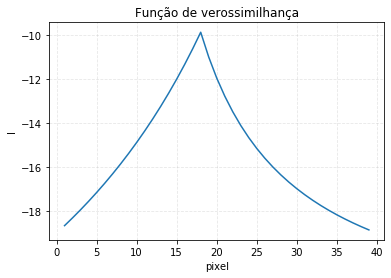

In [8]:
# Plota o gráfico de func_obj_l_L_mu
import matplotlib.pyplot as plt
ti = 0
tf = N
# Solução exata cuidado estou começãndo do 1 para não ter divisão por zero
t      = np.linspace(0, 0, N)
sol_ex = np.linspace(0, 0, N)
for i in range(1, N):
    # Novamente o sinal aqui é para corrigir a troca que fizemos dentro da função
    t[i] = i
    sol_ex[i] = -func_obj_l_L_mu(t[i],GR, N, matdf1, matdf2)
# Plot
# Começei em 1 para o gráfico ficar melhor pois sol_ex[0] = 0
plt.plot(t[1:N], sol_ex[1:N])
plt.title('Função de verossimilhança')
plt.xlabel('pixel')
plt.ylabel('l')
plt.grid(alpha=.3, linestyle='--')
plt.show()